In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.


In [ ]:
import pandas as pd

a_hde = pd.read_csv('https://docs.google.com/spreadsheets/d/1hqLKOkoweV3Kr0OprRhN1wZ1rPyDLuBOVp-v5L848dg/export?format=csv')
a_hde

,num,setup,punch,text,humor,type,connector,type2,connector2,comment
0,0,"Мандат депутата — документ,",удостоверяющий двуличность.,"Мандат депутата — документ, удостоверяющий дву...",1,GP,NaN,GP,NaN,Изм уст
1,0,"Мандат депутата — документ,",удостоверяющий личность.,"Мандат депутата — документ, удостоверяющий лич...",0,NaN,NaN,GP,NaN,NaN
2,1,"На кого можно положиться,",на того можно и взвалить.,"На кого можно положиться, на того можно и взва...",1,RL,NaN,RL,NaN,NaN
3,1,"На кого можно положиться,",тому можно и доверять.,"На кого можно положиться, тому можно и доверять.",0,NaN,NaN,RL,NaN,NaN
4,2,"Когда жена узнала, что в сексе я люблю ролевые...",сразу же предложила мне роль зрителя.,"Когда жена узнала, что в сексе я люблю ролевые...",1,RL,NaN,RL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3193,1628,Я кроме русского знаю ещё пять языков: английс...,"Говорят, что существуют и другие языки, но я о...",Я кроме русского знаю ещё пять языков: английс...,1,GP,NaN,GP,NaN,NaN
3194,1628,Я кроме русского знаю ещё пять языков: английс...,"Говорят, что существуют и другие языки, но я и...",Я кроме русского знаю ещё пять языков: английс...,0,NaN,NaN,GP,NaN,NaN
3195,1629,- У меня муж в последнее время стал просто шёл...,"- Да, мой тоже очень скользкий.",- У меня муж в последнее время стал просто шёл...,1,RL,Сет-ап,RL,Сет-ап,Два неоднозн
3196,1629,- У меня муж в последнее время стал просто шёл...,"- Да, мой тоже очень ласковый.",- У меня муж в последнее время стал просто шёл...,0,NaN,NaN,RL,Сет-ап,NaN


In [ ]:
# conversational

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased-conversational")

In [ ]:
# conversational обученная на fun train

from transformers import BertModel

# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertModel.from_pretrained(
    "bert-base/fun_trained_convbert_epoch_3"
)

In [ ]:
import torch
from sklearn.metrics.pairwise import cosine_similarity

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def cos_sim(row):
  setup = row['setup']
  punch = row['punch']

  # Tokenize the sentences
  tokens1 = tokenizer.tokenize(setup)
  tokens2 = tokenizer.tokenize(punch)

  # Add [CLS] and [SEP] tokens
  tokens = ['[CLS]'] + tokens1 + ['[SEP]'] + tokens2 + ['[SEP]']

  # Convert tokens to input IDs
  input_ids = tokenizer.convert_tokens_to_ids(tokens)

  # Convert tokens to input IDs
  input_ids1 = torch.tensor(tokenizer.convert_tokens_to_ids(tokens1)).unsqueeze(0)  # Batch size 1
  input_ids2 = torch.tensor(tokenizer.convert_tokens_to_ids(tokens2)).unsqueeze(0)  # Batch size 1

  #input_ids1 = input_ids1.to(device='cuda')
  #input_ids2 = input_ids2.to(device='cuda')

  # Obtain the BERT embeddings
  with torch.no_grad():
      outputs1 = model(input_ids1)
      outputs2 = model(input_ids2)
      embeddings1 = outputs1.last_hidden_state[:, 0, :]  # [CLS] token
      embeddings2 = outputs2.last_hidden_state[:, 0, :]  # [CLS] token

  # Calculate similarity
  similarity_score = cosine_similarity(embeddings1, embeddings2)

  return similarity_score

In [ ]:
a_hde['cos_sim'] = a_hde.apply(lambda row: cos_sim(row), axis=1)

In [ ]:
a_hde['cos_sim'] = a_hde.apply(lambda row: row.cos_sim[0][0], axis=1)

In [ ]:
a_hde

,num,setup,punch,text,humor,type,connector,type2,connector2,comment,cos_sim
0,0,"Мандат депутата — документ,",удостоверяющий двуличность.,"Мандат депутата — документ, удостоверяющий дву...",1,GP,NaN,GP,NaN,Изм уст,0.176572
1,0,"Мандат депутата — документ,",удостоверяющий личность.,"Мандат депутата — документ, удостоверяющий лич...",0,NaN,NaN,GP,NaN,NaN,0.202124
2,1,"На кого можно положиться,",на того можно и взвалить.,"На кого можно положиться, на того можно и взва...",1,RL,NaN,RL,NaN,NaN,0.314493
3,1,"На кого можно положиться,",тому можно и доверять.,"На кого можно положиться, тому можно и доверять.",0,NaN,NaN,RL,NaN,NaN,0.199836
4,2,"Когда жена узнала, что в сексе я люблю ролевые...",сразу же предложила мне роль зрителя.,"Когда жена узнала, что в сексе я люблю ролевые...",1,RL,NaN,RL,NaN,NaN,0.156864
...,...,...,...,...,...,...,...,...,...,...,...
3193,1628,Я кроме русского знаю ещё пять языков: английс...,"Говорят, что существуют и другие языки, но я о...",Я кроме русского знаю ещё пять языков: английс...,1,GP,NaN,GP,NaN,NaN,0.284845
3194,1628,Я кроме русского знаю ещё пять языков: английс...,"Говорят, что существуют и другие языки, но я и...",Я кроме русского знаю ещё пять языков: английс...,0,NaN,NaN,GP,NaN,NaN,0.360542
3195,1629,- У меня муж в последнее время стал просто шёл...,"- Да, мой тоже очень скользкий.",- У меня муж в последнее время стал просто шёл...,1,RL,Сет-ап,RL,Сет-ап,Два неоднозн,0.632682
3196,1629,- У меня муж в последнее время стал просто шёл...,"- Да, мой тоже очень ласковый.",- У меня муж в последнее время стал просто шёл...,0,NaN,NaN,RL,Сет-ап,NaN,0.426436


<Axes: xlabel='cos_sim', ylabel='Density'>

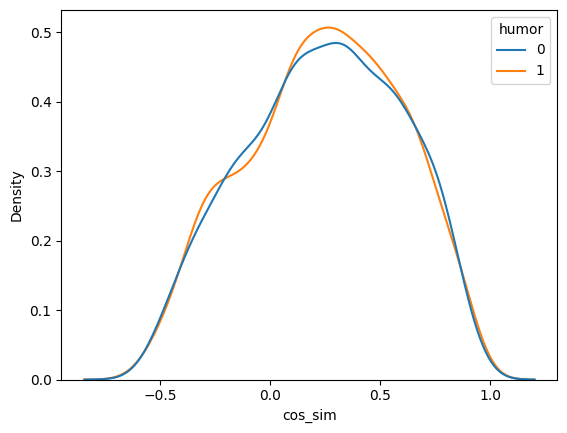

In [ ]:
import seaborn as sns

sns.kdeplot(data=a_hde, x="cos_sim", hue="humor")

<Axes: xlabel='cos_sim', ylabel='Density'>

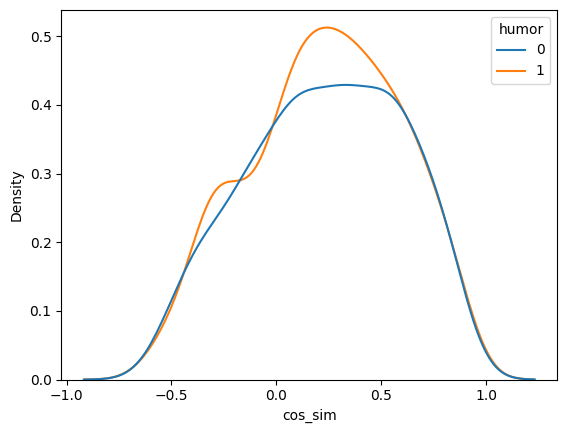

In [ ]:
import seaborn as sns

sns.kdeplot(data=a_hde[a_hde['type2'] == 'GP'], x="cos_sim", hue="humor")

<Axes: xlabel='cos_sim', ylabel='Density'>

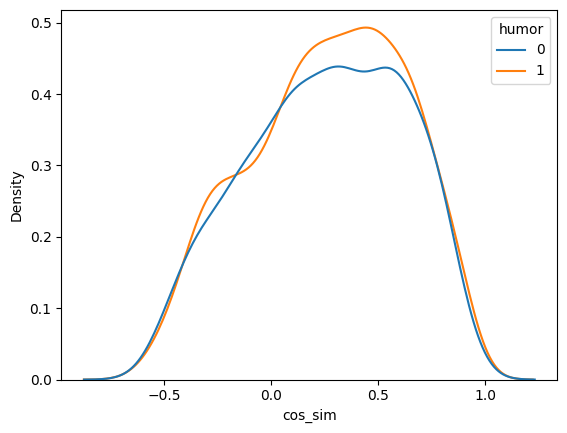

In [ ]:
# коннектор в сет-апе

sns.kdeplot(data=a_hde[(a_hde['type2'] == 'GP') | (a_hde['connector2'] == 'Сет-ап')], x="cos_sim", hue="humor")

<Axes: xlabel='cos_sim', ylabel='Density'>

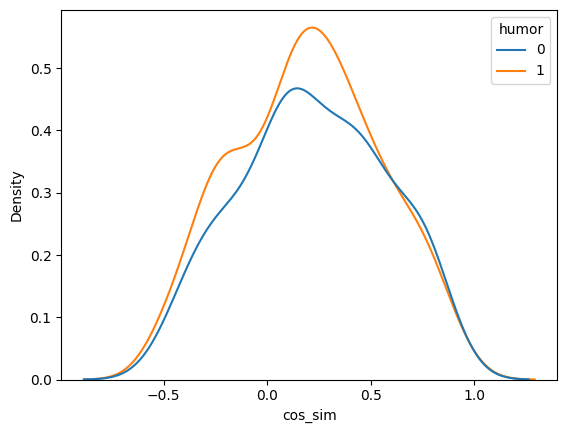

In [ ]:
import seaborn as sns

sns.kdeplot(data=a_hde[a_hde['type2'] == 'C'], x="cos_sim", hue="humor")

<Axes: xlabel='cos_sim', ylabel='Density'>

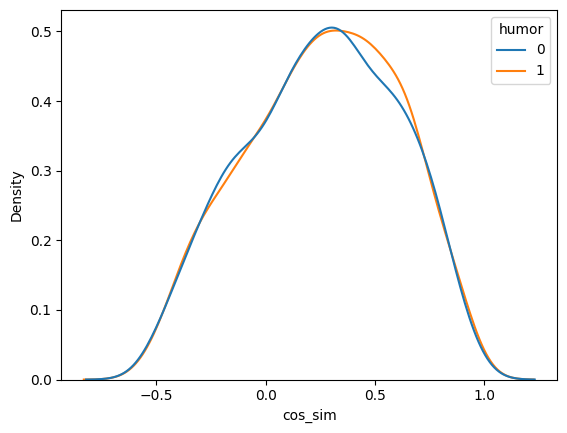

In [ ]:
import seaborn as sns

sns.kdeplot(data=a_hde[a_hde['type2'] == 'RL'], x="cos_sim", hue="humor")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import matthews_corrcoef

def is_predictable(df):

  X = df['cos_sim']
  y = df['humor']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

  # instantiate the model
  gnb = GaussianNB()

  # fit the model
  gnb.fit(X_train.to_numpy().reshape(-1, 1), y_train)

  y_pred = gnb.predict(X_test.to_numpy().reshape(-1, 1))

  return (matthews_corrcoef(y_test, y_pred), y_pred)

In [ ]:
is_predictable(a_hde[a_hde['type2'] == 'C'])

(0.019733016735771835,
 array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1]))

In [ ]:
is_predictable(a_hde[a_hde['type2'] == 'RL'])

(-0.11270987071860442,
 array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0

In [ ]:
is_predictable(a_hde[a_hde['type2'] == 'GP'])

(-0.06966731912120169,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1]))

In [ ]:
is_predictable(a_hde[(a_hde['type2'] == 'GP') | (a_hde['connector2'] == 'Сет-ап')])

(-0.005004219747143967,
 array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 